# **Bank Marketing Campaign Analysis**
This project focuses on cleaning and analyzing data from a bank's marketing campaign. The goal is to explore customer information, clean the dataset, and uncover patterns that explain why some customers choose to subscribe to a term deposit. By analyzing this data, we can provide insights to improve future marketing strategies. The dataset used in this project is the **Bank Marketing Dataset**, which is publicly available on [Kaggle](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset).

## **Objectives**
1. Clean and prepare the data for analysis by handling missing values, errors, and inconsistencies.
2. Explore the dataset to identify trends, patterns, and relationships between variables.
3. Provide clear insights to help understand customer behavior and improve campaigns
---

### Load and Inspect the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt # For visualization
import seaborn as sns # For visualization

In [2]:
# Load the dataset
file_path = 'bank.csv'
data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the dataset to get an overview
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Checking the structure and summary of the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
print("\nBasic Statistical Summary (Numerical Columns):")
display(data.describe())


Basic Statistical Summary (Numerical Columns):


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Data Cleaning

In [6]:
# Checking for missing values
print("\nSummary of Missing Values:")
print(data.isnull().sum())


Summary of Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [7]:
# Inspecting unique values in each categorical column
categorical_columns = [
    "job", "marital", "education", "default", "housing", "loan",
    "contact", "month", "poutcome", "deposit"
]

# Printing unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}':\n{data[col].unique()}\n")

Unique values in 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced']

Unique values in 'education':
['secondary' 'tertiary' 'primary' 'unknown']

Unique values in 'default':
['no' 'yes']

Unique values in 'housing':
['yes' 'no']

Unique values in 'loan':
['no' 'yes']

Unique values in 'contact':
['unknown' 'cellular' 'telephone']

Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in 'poutcome':
['unknown' 'other' 'failure' 'success']

Unique values in 'deposit':
['yes' 'no']



In [8]:
# Checking the frequency of "unknown" in relevant columns
columns_with_unknown = ["job", "education", "contact", "poutcome"]

for col in columns_with_unknown:
    unknown_count = data[col].value_counts().get("unknown", 0)
    total_count = len(data[col])
    print(f"'{col}' - 'unknown' count: {unknown_count} ({(unknown_count / total_count) * 100:.2f}%)")

'job' - 'unknown' count: 70 (0.63%)
'education' - 'unknown' count: 497 (4.45%)
'contact' - 'unknown' count: 2346 (21.02%)
'poutcome' - 'unknown' count: 8326 (74.59%)


### Observations

1. **`poutcome`**:
   - Most customers (74.59%) have "unknown" as the previous outcome, indicating they were not contacted in prior campaigns.
   - This is valid and provides meaningful information, as "unknown" here means "no prior contact."

2. **`contact`**:
   - About 21.02% of customers have "unknown" as the contact method.
   - This could affect analysis and will need to be handled carefully.

3. **`job`**:
   - Only 0.63% of rows have "unknown" for the job category.
   - These rows will be removed because "unknown" cannot be interpreted as unemployed, as the dataset already includes a category for unemployed customers.

4. **`education`**:
   - 4.45% of rows have "unknown" for education, this could mean they are uneducated.
   - This likely represents customers who did not disclose their education level or have no formal education. So "unkownn" will be changed to "no  formal education"

In [9]:
# Removing rows where 'job' is 'unknown'
initial_row_count = len(data)
data = data[data['job'] != 'unknown']
final_row_count = len(data)

# Reporting the number of rows removed
removed_rows = initial_row_count - final_row_count
print(f"Removed {removed_rows} rows where 'job' was 'unknown'.")
print(f"Dataset now contains {final_row_count} rows.")

Removed 70 rows where 'job' was 'unknown'.
Dataset now contains 11092 rows.


In [10]:
# Replacing "unknown" in the 'education' column with "no formal education"
data['education'] = data['education'].replace('unknown', 'no formal education')

# Checking the updated unique values in the 'education' column
print("Updated unique values in 'education':")
print(data['education'].unique())

Updated unique values in 'education':
['secondary' 'tertiary' 'primary' 'no formal education']


In [11]:
# Checking for duplicate rows in the dataset
duplicate_count = data.duplicated().sum()

# Displaying the count of duplicate rows
print(f"Number of duplicate rows in the dataset: {duplicate_count}")

Number of duplicate rows in the dataset: 0


In [12]:
# Renaming columns to have descriptive and consistent names
data.rename(
    columns={
        "job": "job_type",
        "marital": "marital_status",
        "education": "education_level",
        "default": "credit_default",
        "balance": "account_balance",
        "housing": "housing_loan",
        "loan": "personal_loan",
        "contact": "contact_method",
        "day": "last_contact_day",
        "month": "last_contact_month",
        "duration": "last_contact_duration",
        "campaign": "campaign_contacts",
        "pdays": "days_since_last_contact",
        "previous": "previous_contacts",
        "poutcome": "previous_outcome",
        "deposit": "term_deposit"
    },
    inplace=True
)

# Displaying the updated column names
print("Updated column names:")
print(data.columns.tolist())

Updated column names:
['age', 'job_type', 'marital_status', 'education_level', 'credit_default', 'account_balance', 'housing_loan', 'personal_loan', 'contact_method', 'last_contact_day', 'last_contact_month', 'last_contact_duration', 'campaign_contacts', 'days_since_last_contact', 'previous_contacts', 'previous_outcome', 'term_deposit']


# Exploratory Data Analysis

In [13]:
# Setting up a clean style for visualizations
sns.set_style("whitegrid")

### Analyze the Target Variable (`term_deposit`)

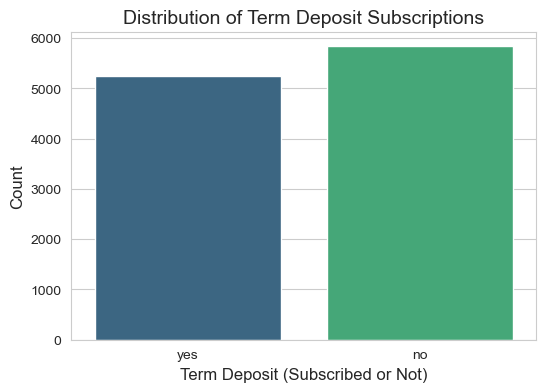

In [14]:
# Analyze the Target Variable Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x=data['term_deposit'], palette="viridis")
plt.title("Distribution of Term Deposit Subscriptions", fontsize=14)
plt.xlabel("Term Deposit (Subscribed or Not)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

More customers did not subscribe (`no`) than those who did (`yes`).

### Exploring Numerical Features

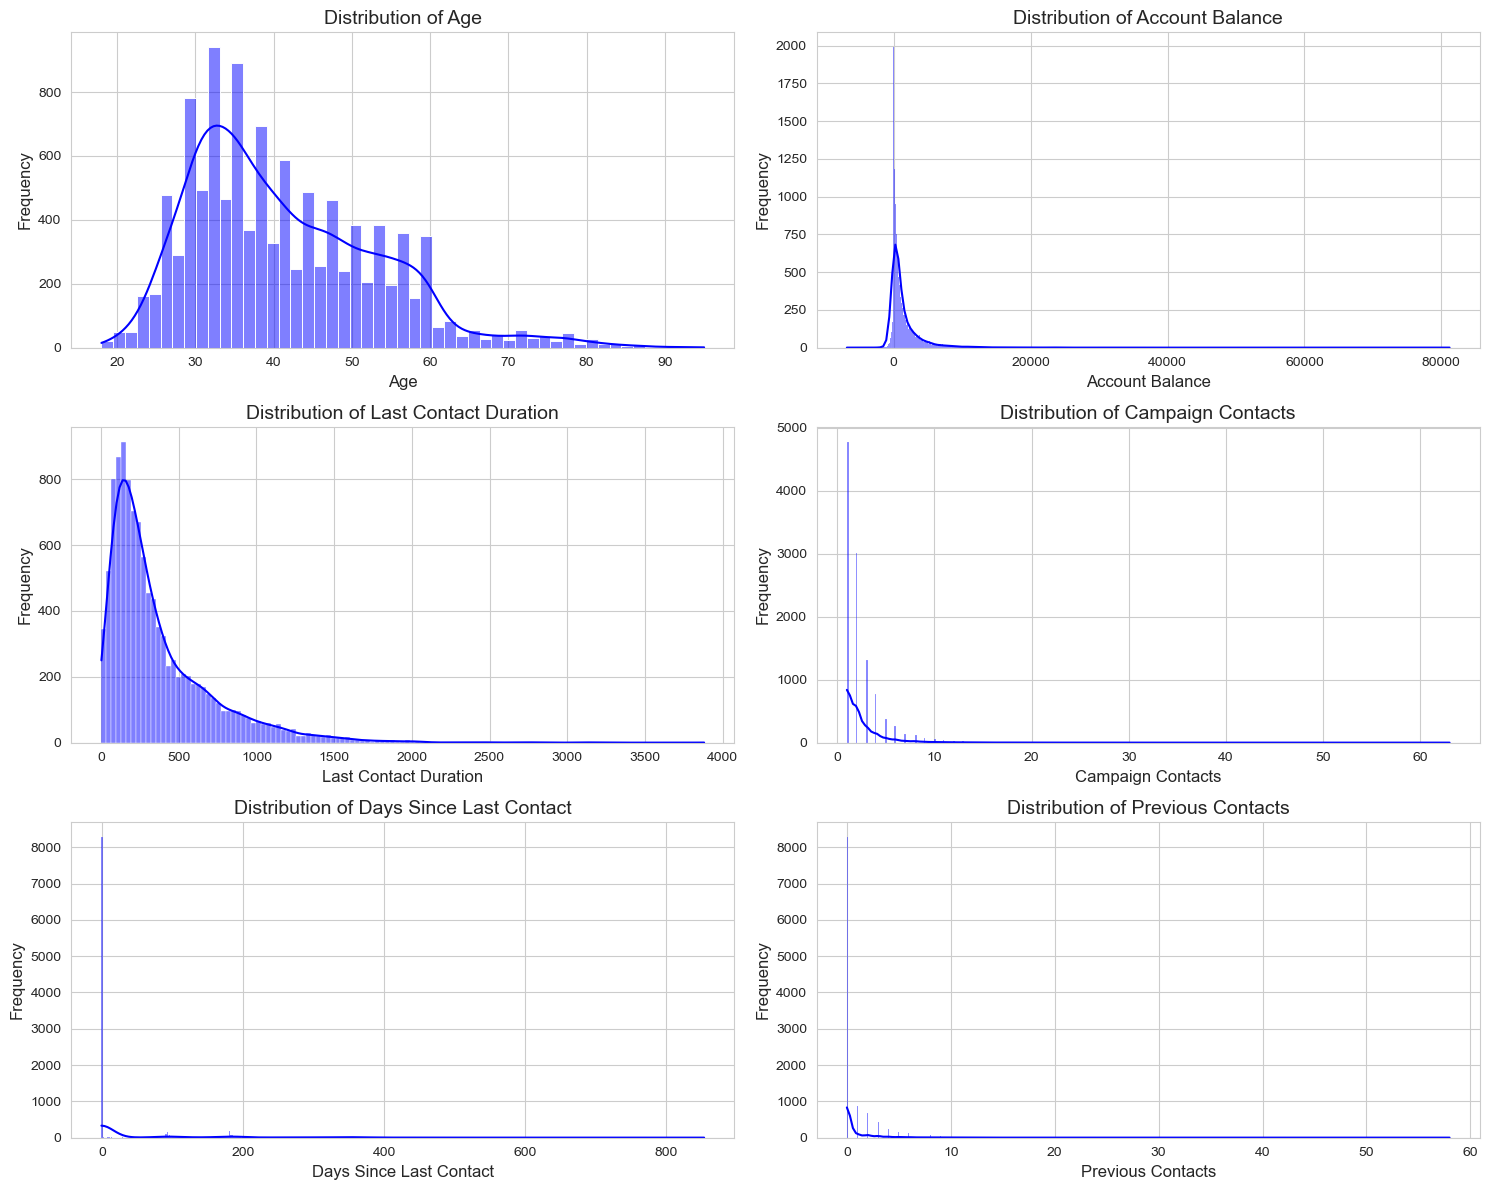

In [15]:
# Selecting numerical columns for visualization
numerical_columns = [
    'age', 'account_balance', 'last_contact_duration',
    'campaign_contacts', 'days_since_last_contact', 'previous_contacts'
]

# Setting up the grid for multiple visualizations
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Plotting the distribution for each numerical feature
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

### **Observations**

1. Most customers are middle-aged (30–40 years old) with low or zero account balances.
2. Calls are generally short, and most customers were contacted fewer than 5 times.
3. A significant proportion of customers were never contacted before (-1 in `days_since_last_contact).
t`).


### Relationship Between Numerical Features and Target Variable

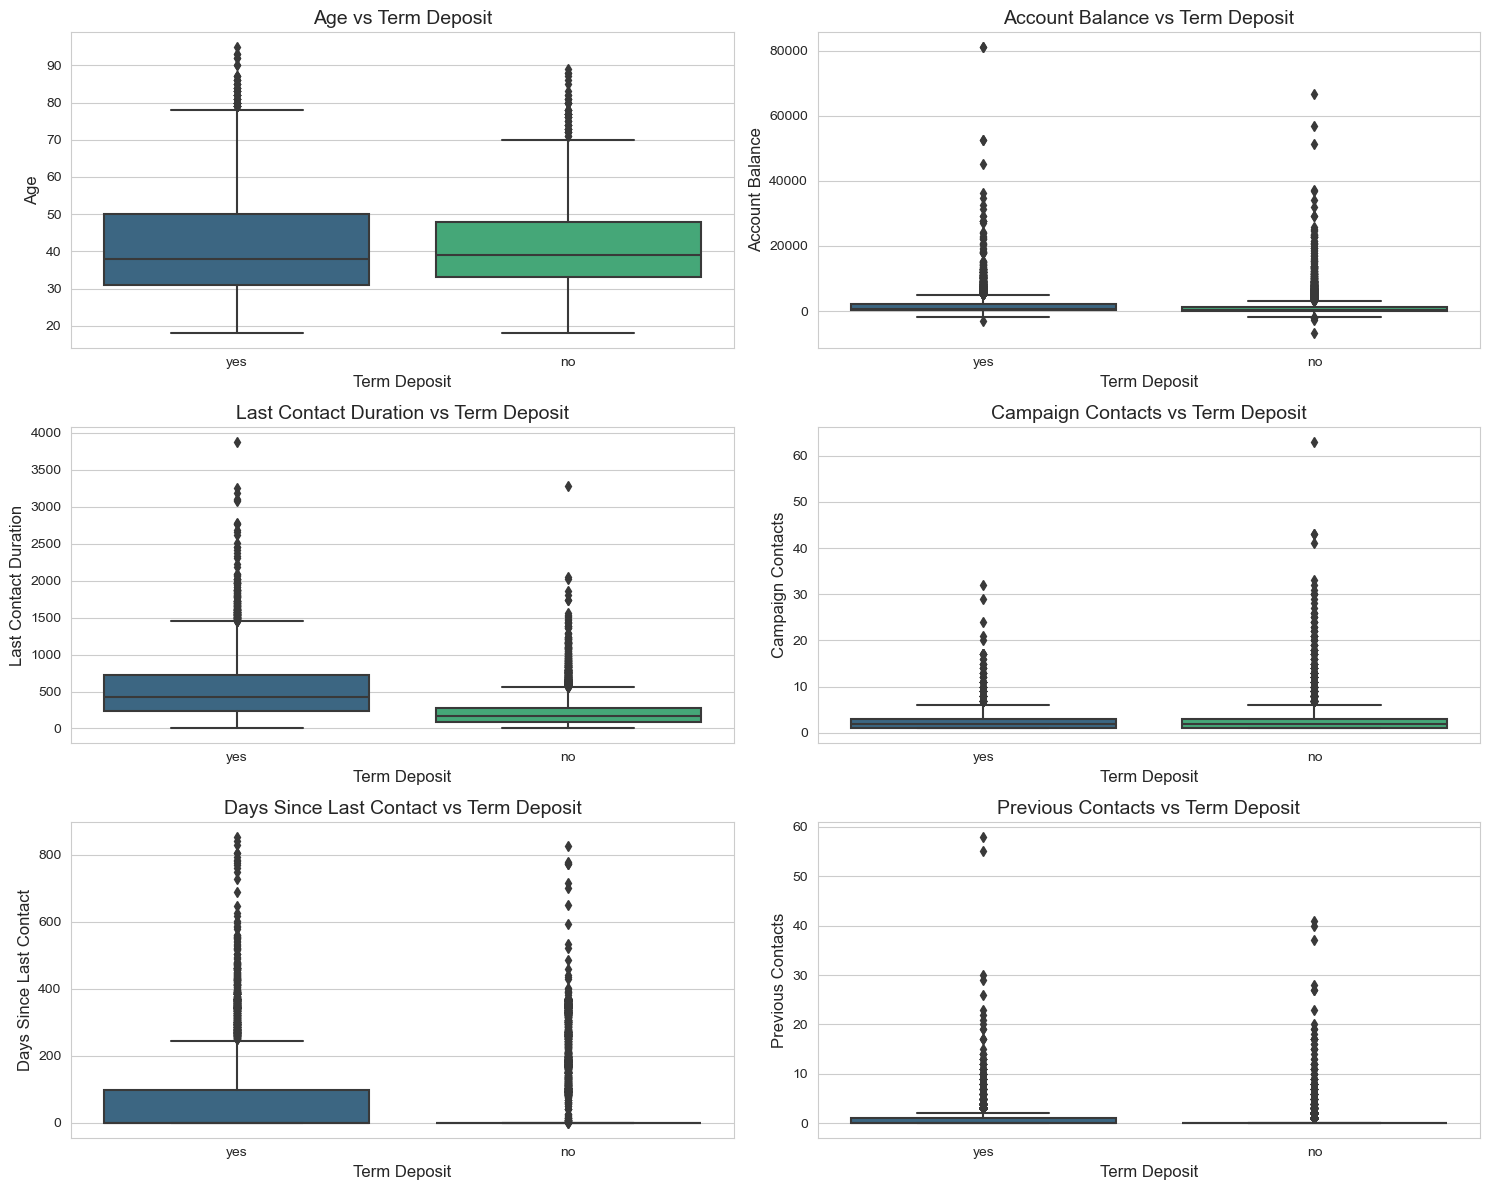

In [16]:
# Setting up a grid for visualizing relationships
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Plotting boxplots for each numerical feature against the target variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data['term_deposit'], y=data[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"{col.replace('_', ' ').title()} vs Term Deposit", fontsize=14)
    axes[i].set_xlabel("Term Deposit", fontsize=12)
    axes[i].set_ylabel(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

### **Observations**

- Customers with higher account balances are more likely to subscribe to a term deposit.
- Customers contacted fewer times during the campaign tend to subscribe more.
- Recent prior contacts also increase the likelihood of subscription.

### Exploring Categorical Features

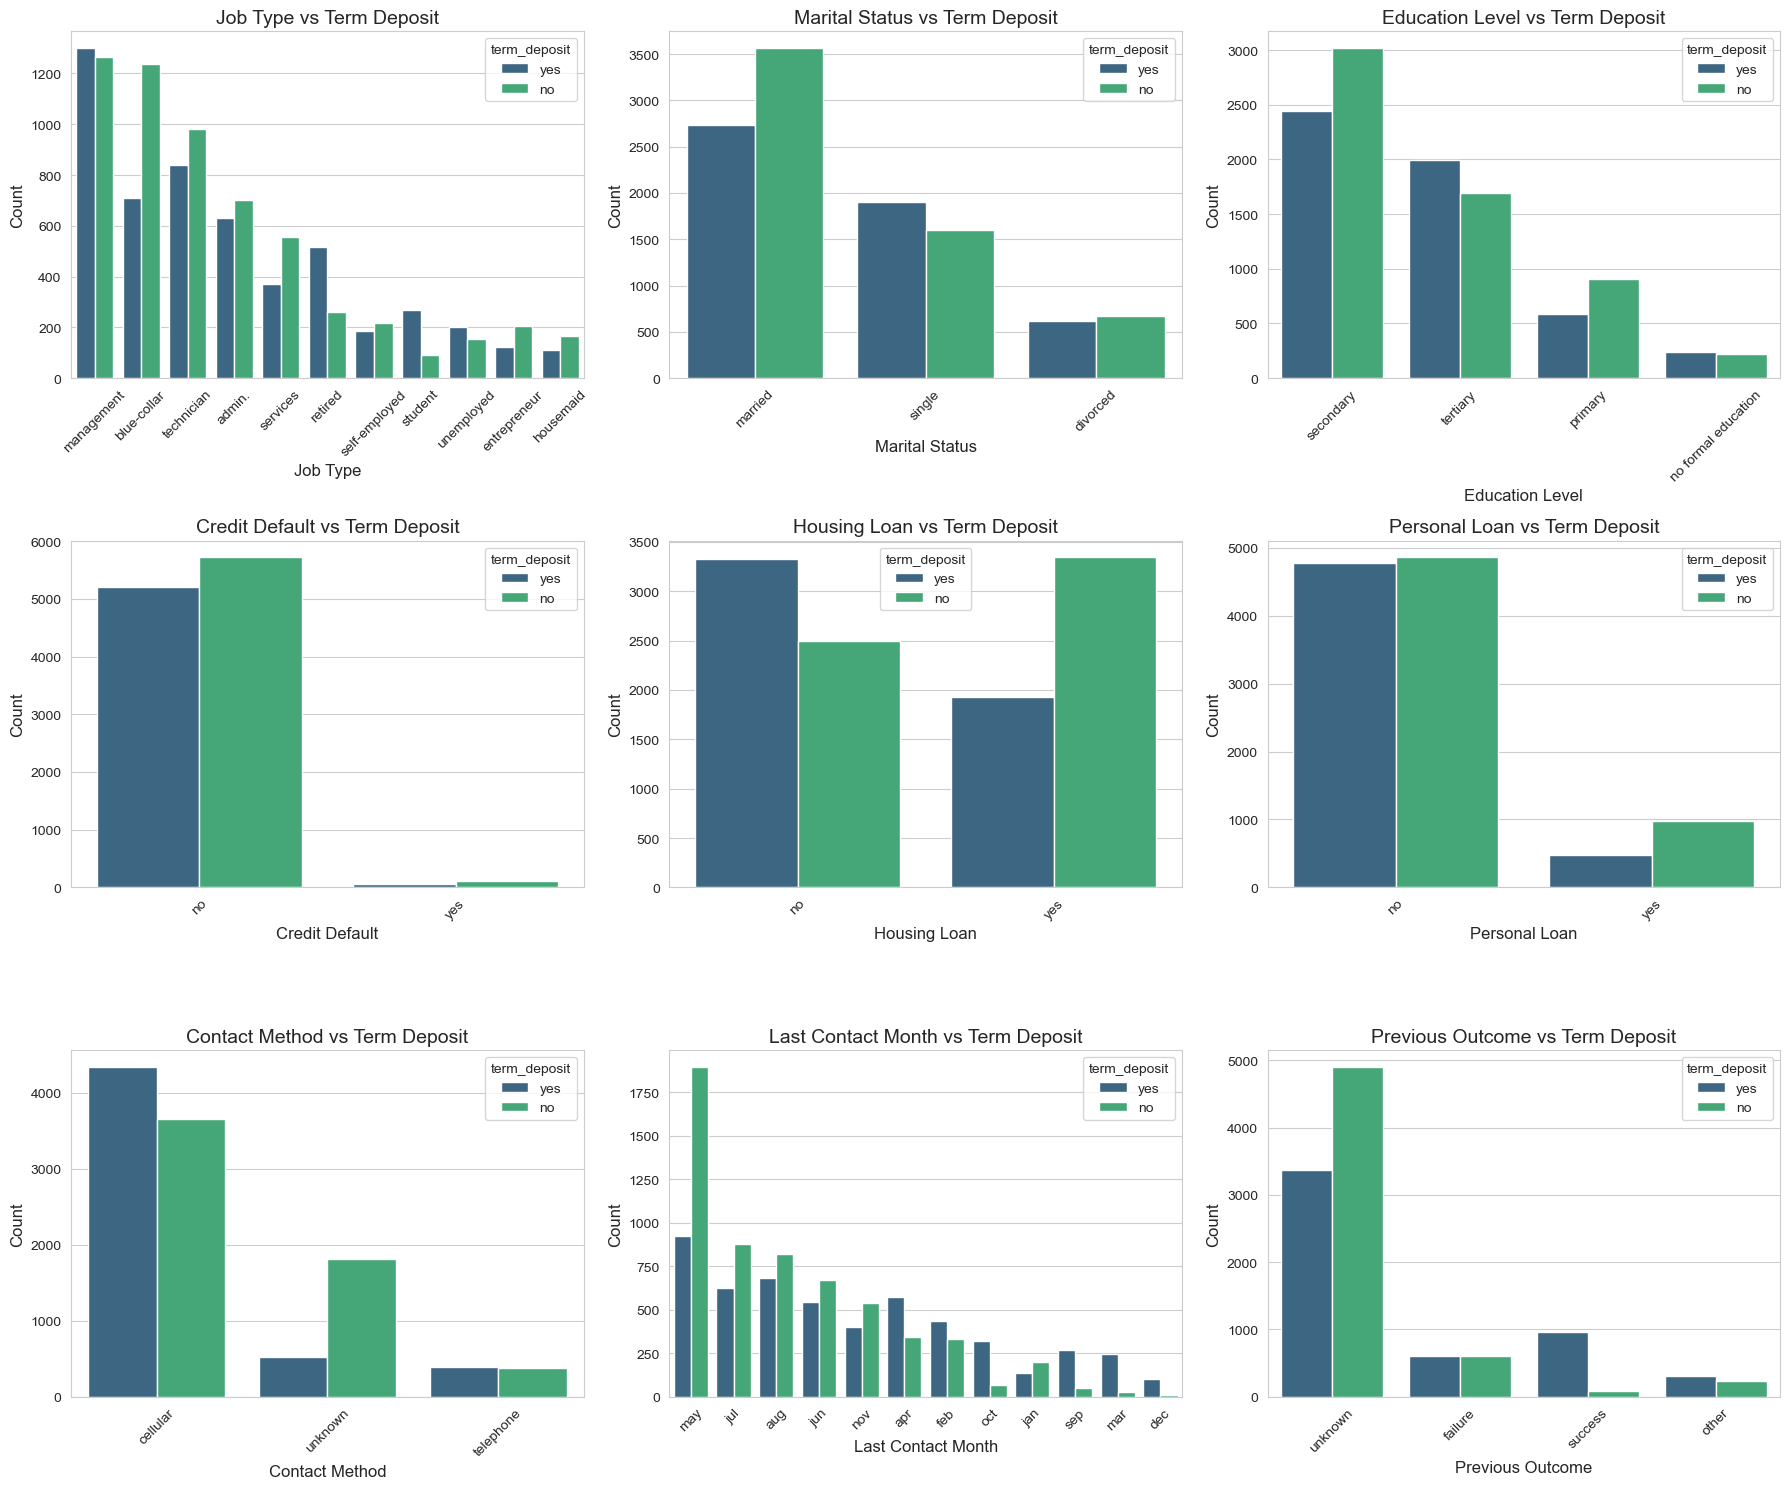

In [17]:
# Selecting categorical columns for analysis
categorical_columns = [
    'job_type', 'marital_status', 'education_level',
    'credit_default', 'housing_loan', 'personal_loan',
    'contact_method', 'last_contact_month', 'previous_outcome'
]

# Setting up a grid for visualizing distributions of categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Plotting count plots for each categorical feature
for i, col in enumerate(categorical_columns):
    sns.countplot(x=data[col], hue=data['term_deposit'], ax=axes[i], palette="viridis", order=data[col].value_counts().index)
    axes[i].set_title(f"{col.replace('_', ' ').title()} vs Term Deposit", fontsize=14)
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### **Observations**

- Retirees and students have higher subscription rates compared to other job categories.
- Single customers are more likely to subscribe than married or divorced ones.
- Customers with tertiary education show the highest subscription rates.
- Subscriptions are higher for customers contacted via mobile phones.
- A successful prior campaign significantly increases the likelihood of subscription.

### Subscription Rates by Month

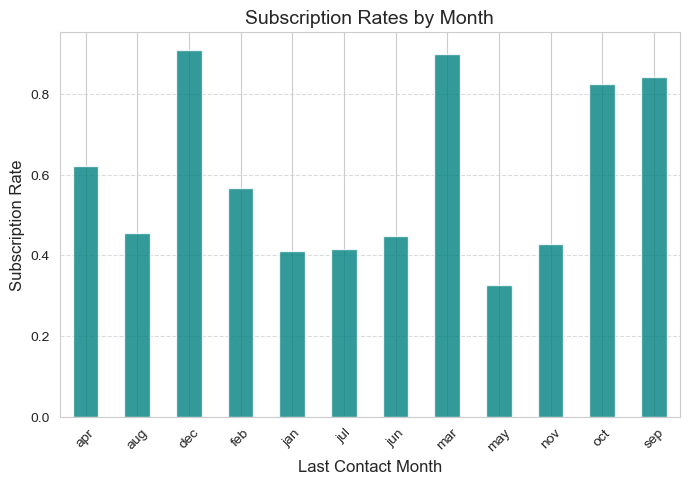

In [18]:
# Calculating the subscription rate for each month
month_subscription_rates = data.groupby('last_contact_month')['term_deposit'].value_counts(normalize=True).unstack()['yes']

# Plotting subscription rates by month
plt.figure(figsize=(8, 5))
month_subscription_rates.sort_index().plot(kind='bar', color='teal', alpha=0.8)
plt.title("Subscription Rates by Month", fontsize=14)
plt.xlabel("Last Contact Month", fontsize=12)
plt.ylabel("Subscription Rate", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations**

- Subscription rates are highest in March and December.
- May has the lowest subscription rate, despite being a busy month for contacts.

This suggests that some months are more effective for term deposit subscriptions, which may reflect campaign timing.

# **Recommendations**

- Target customers with higher account balances and positive prior campaign outcomes.
- Avoid over-contacting customers to prevent negative responses.
- Prioritize mobile contact for better results.
- Concentrate campaigns in high-performing months like **March** and **December**.
- Evaluate strategies for improving performance in low-performing months like **May**.
- Develop customized messages for retirees, students, and highly educated customers, who are more likely to subscribe.